In [ ]:
# Figure.savefig_matplotlib.figure.Figure 타입

axes = df.plot(...)
figure = axes.figure    # 혹은 ax.get_figure()

figure.savefig(저장경로, dpi = None, facecolor = 'w', edgecolor = 'w',
    orientation = 'portrait', papertype = None, 이 외 옵션)
    # 지원 포맷 : eps, pdf, pgf, png, ps, raw, rgba, svg
    # dpi => default 값은 75, 출력을 하기 위해서는 300을 줄 경우 좀 더 고품질 이미지를 얻을 수 있다
    

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.rc('axes', unicode_minus = False)
plt.rc('font', family = 'Malgun Gothic')

import pandas as pd

In [2]:
df = pd.read_excel('sample-line-1.xlsx', index_col='날짜')
print(df.shape)
df.head()

(3189, 5)


,체결가,전일비,등락률,거래량(천주),거래대금(백만)
날짜,,,,,
2018-11-23,266.33,1.43,-0.53%,58346,2670694
2018-11-22,267.76,0.51,-0.19%,63147,2917863
2018-11-21,268.27,1.31,-0.49%,79375,3726326
2018-11-20,269.58,2.73,-1.00%,79088,3667388
2018-11-19,272.31,0.66,+0.24%,73094,3401282


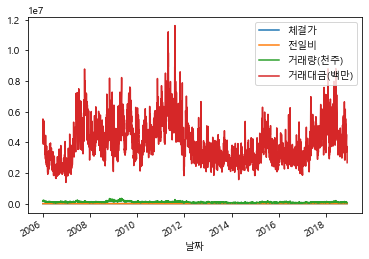

In [3]:
ax = df.plot()

In [10]:
figure33 = ax.figure
figure33.savefig('일일주식현황.png', dpi = 300)    

In [6]:
%ls *.png
# 한글은 왜 짤리는지?

C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: 1A2A-9520

 c:\Users\student\AppData\Local\Programs\Microsoft VS Code\bin ���͸�

2020-06-06  ���� 02:23            23,666 �����ֽ���Ȳ.png
               1�� ����              23,666 ����Ʈ
               0�� ���͸�  386,530,992,128 ����Ʈ ����


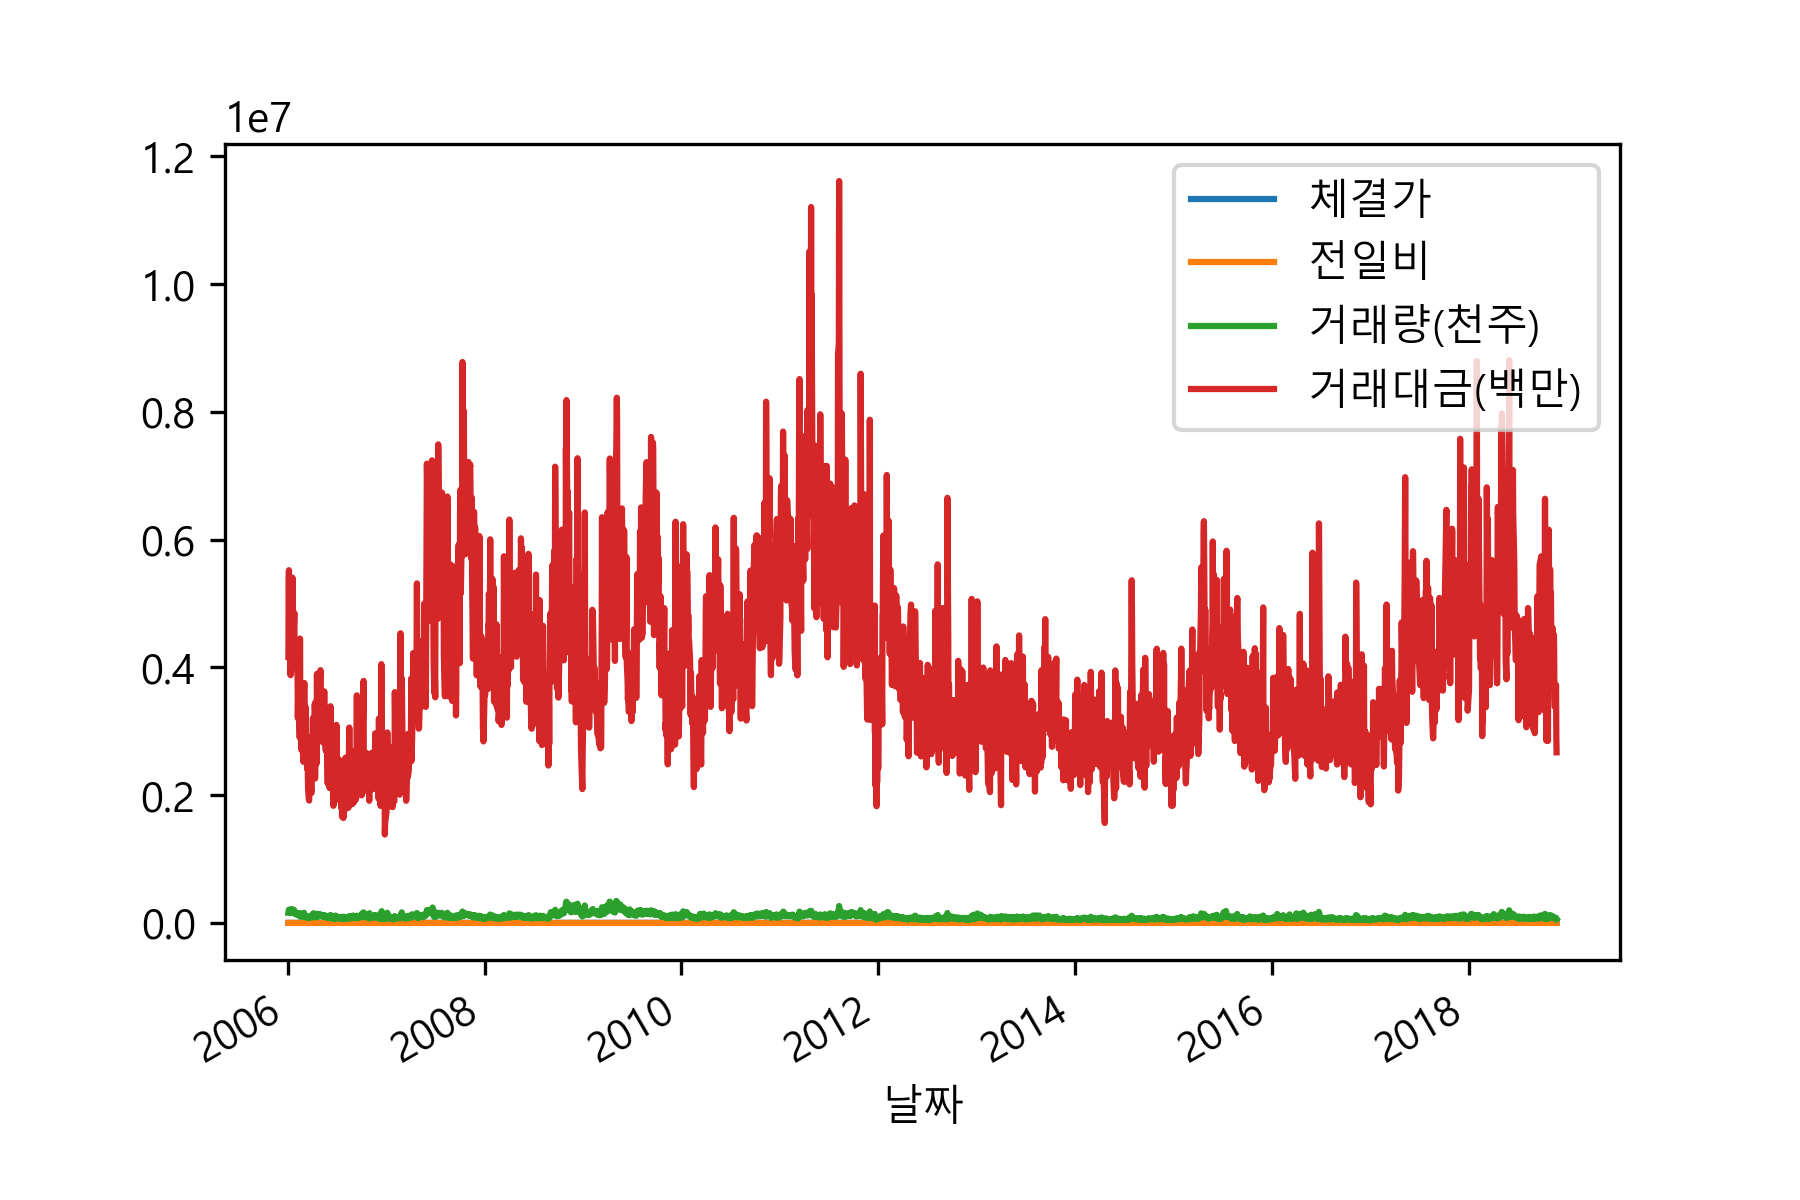

In [12]:
from IPython.display import Image
Image('일일주식현황.png')

In [13]:
# 차트 이미지를 엑셀에 반영하기
## Figure를 이미지 파일로 저장해서 엑셀에 수동으로 붙여넣기
## Figure를 이미지 저장해서, 이미지를 클립보드에 복사한 뒤 엑셀에 수동으로 붙여넣기
## Figure를 xlwings를 사용해 바로 붙여넣기

import xlwings as xw
xw.__version__

'0.17.1'

In [ ]:
# Figure를 엑셀에 추가하기
sheet.picture.add(image, link_to_file = False, save_with_document = True,
left = 0, top = 0, width = None, height = None, name = None, update = False)
# image : 이미지 파일경로 혹은 Figure 객체
# name : 각 Picture에 대한 식별자, 지정하지 않으면 'picture 일련번호' 형식으로 자동 지정
# update : name이 겹칠 경우 업데이트 여부, name이 겹치는데 update가 false일 경우 ShapeAlreadyExists 예외 발생

In [14]:
sheet33 = xw.sheets.active

In [15]:
sheet33.pictures.add(figure33)

<Picture 'Picture 1' in <Sheet [통합 문서1]Sheet1>>

In [17]:
sheet33.pictures.add(figure33, name = '일일주식현황', update = True)

<Picture '일일주식현황' in <Sheet [통합 문서1]Sheet1>>

In [ ]:
# DataFrame/Figure 반영하기

import xlwings as xw

def 엑셀에_반영(start_range, df, name):
    ax = df.plot(figsize = (7,4))   # df 전체 데이터로 plot
    start_range.value = df.iloc[:10]    # 지정 Range에 df 중 상위 10개 row 반영
# picture left/top 좌표 계산
    table_range = sheet.range(start_cell).expand()
    left = table_range.left + table_range.width + 1     # +1을 주는 이유는 테이블 내용 한칸 옆에 그래프를 출력하기 위해서이다
    top = table_range.top
    sheet.picture.add(ax.figure, name = name, update = True, left = left, top = top)
    # 엑셀 컬럼 가로크기 자동 조정
    sheet.range(start_cell).expand().columns.autofit()      # 내용만큼 컬럼 크기가 길어짐

In [18]:
df.iloc[:10]

,체결가,전일비,등락률,거래량(천주),거래대금(백만)
날짜,,,,,
2018-11-23,266.33,1.43,-0.53%,58346,2670694
2018-11-22,267.76,0.51,-0.19%,63147,2917863
2018-11-21,268.27,1.31,-0.49%,79375,3726326
2018-11-20,269.58,2.73,-1.00%,79088,3667388
2018-11-19,272.31,0.66,+0.24%,73094,3401282
2018-11-16,271.65,0.11,+0.04%,72867,3382415
2018-11-15,271.54,2.66,+0.99%,72804,3522952
2018-11-14,268.88,0.82,-0.30%,85611,4249973
2018-11-13,269.70,1.87,-0.69%,85526,4513373


In [20]:
xw.view(df.iloc[:10], sheet = sheet33)  # 현재 시트에 시트 실행

In [23]:
sheet33.range('A1').value = df.iloc[:10]      # 이런식으로 현재 시트에 실행도 가능

In [25]:
left1 = sheet33.range('G1').left
top1 = sheet33.range('G1').top

sheet33.pictures.add(figure, name = '일일주식현황', update = True, left = left1, top = top1)

<Picture '일일주식현황' in <Sheet [통합 문서1]Sheet1>>

In [28]:
index1 = df.index
sample_df = df.sample(frac=1).reset_index(drop=True)
sample_df.index = index1

엑셀에_반영(xw.Range('C3'), df, '일일주식현황')     # 엑셀에 데이터프레임과 차트 반영

NameError: name '엑셀에_반영' is not defined